In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *
from itertools import product

In [2]:
def l1_distance(x1, y1, x2, y2):
    return np.abs(x1-x2) + np.abs(y1 - y2)

def l2_distance(x1, y1, x2, y2):
    return np.sqrt(np.square(x1-x2) + np.square(y1-y2))

In [3]:
l1_distance(-1, 1, 0, 2), l2_distance(-1, 1, 0, 2)

(2, 1.4142135623730951)

In [4]:
def plot_points(x, y):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(x, y, c='white', s=50)
    return fig, ax

In [5]:
x = np.arange(0, 8)
x, y = np.meshgrid(x,x)

(<matplotlib.figure.Figure at 0x7f5ac4258dd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5a95799650>)

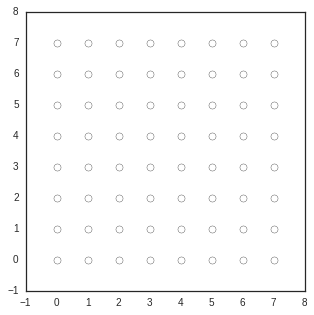

In [6]:
plot_points(x,y)

In [7]:
def get_neighbors(x, y, xs, ys, metric, treshold):
    neighbors = []
    for p in set(product(xs.flatten(), ys.flatten())):
        #x1, y1, x2, y2
        if metric(x, y, p[0], p[1]) <= treshold:
            neighbors.append(p)
    return neighbors

In [110]:
neighbors = get_neighbors(2, 2, x, y, l1_distance,1.5)
x_n, y_n = zip(*neighbors)
neighbors

[(1, 2), (2, 2), (3, 2), (2, 3), (2, 1)]

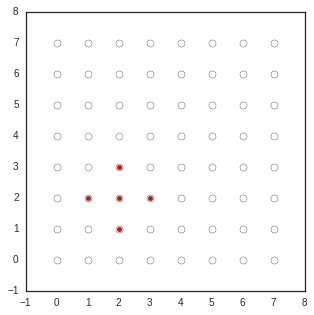

In [111]:
fig, ax = plot_points(x,y)
ax.scatter(x_n, y_n, c='red')

In [61]:
def tuple_to_point(coords):
    index = coords[0] * 8 + coords[1]
    return index

In [70]:
all_neighbors = []
for p in set(product(x.flatten(), y.flatten())):
    n = get_neighbors(p[0], p[1], x, y, l1_distance, 4.0)
    n = [tuple_to_point(c) for c in n]
    all_neighbors.append(n)

In [71]:
def points_to_interaction_terms(neighbors, num_points = 64):
    interaction_term = [False] * num_points
    for i in neighbors:
        interaction_term[i] = True
    return interaction_term

In [72]:
interaction_terms = [points_to_interaction_terms(neighbors, 64) for neighbors in all_neighbors]

In [73]:
len(np.where(np.array(interaction_terms).flatten() == True)[0]) - 64

1660